In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle

import os 

import numpy as np

import pandas as pd

from umap import UMAP

from tensorflow.keras.models import load_model

from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering, Birch
from hdbscan import HDBSCAN

import matplotlib.pyplot as plt
import seaborn as sns

from modules.utils.viz_utils import cluster_inspection

In [3]:
sns.set(font_scale=1.5, style='whitegrid')

## Load objects

In [4]:
extractor = load_model('results\\models\\features_extractor')
estimator = load_model('results\\models\\sentiment_estimator')

In [6]:
embeddings = []
sentences = []
padded_sentences = []
sentiments = []
for batch in range(len(os.listdir('data\\inputs'))):
    
    inp_btch = np.load(f'data\\inputs\\{batch}.npy')
    
    embeddings.append(extractor.predict(inp_btch)[:, -1, :])
    sentences.append(inp_btch)
    sentiments.append(estimator.predict(inp_btch)[0].argmax(axis=2)[:, -1])

for btch in sentences:
    
    padded = np.zeros(shape=(btch.shape[0], 120))
    padded[:, 0: btch.shape[1]] = btch
    padded_sentences.append(padded)
    
sentences = np.vstack(padded_sentences)
embeddings = np.vstack(embeddings)
sentiments = np.hstack(sentiments)

In [7]:
manifolds = UMAP(n_components=3, n_neighbors=100).fit_transform(embeddings)

In [8]:
manifolds.shape

(26207, 3)

## Simple Predictions

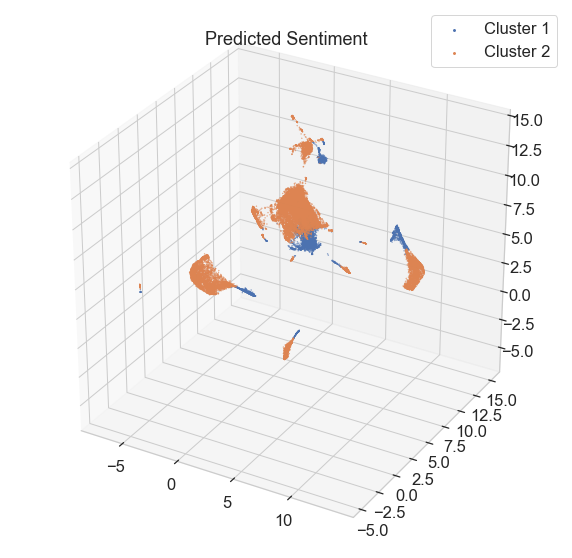


Cluster 1

Positive : 1.0

* -finally done with my room sweet .

* as a reward , you may download a free copy of emailunlimited on http : //www.4officeautomation.com

* is full up now , scrummy tea , and now curled up on the couch watching britains got talent

* @ iamthecommodore have fun ... which u will .

* @ shonarino haha exactly ! so i sleep through the day instead

* @ lil_maggie @ jasper_in_forks get him to sing the one he sung on our honeymoon

* @ alansheppard he he ... .morning !

* lost 1/0 it 's okay though

* vettel vs f95 ... thank god there is more than one screen at my parents home

* @ jeffgammage ok ... leaving soon ... if i do n't catch you later twitter gang- be safe and night night


Cluster 2

Negative : 1.0

* thanks alli now i got that black eyed peas & quot ; boom boom bullshit & quot ; stuck in my head

* see 's candies wo n't have any of their seasonal & quot ; summertime & quot ; candy this year due to a shortage of good hazelnuts .

* @ exitshikari thanks

In [10]:
results  = cluster_inspection(
    manifolds, 
    sentences, 
    sentiments, 
    sentiments, 
    title='Predicted Sentiment',
    embedding=embeddings,
    pad=0,
    s=0.1
)

## Clustering With K-means

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


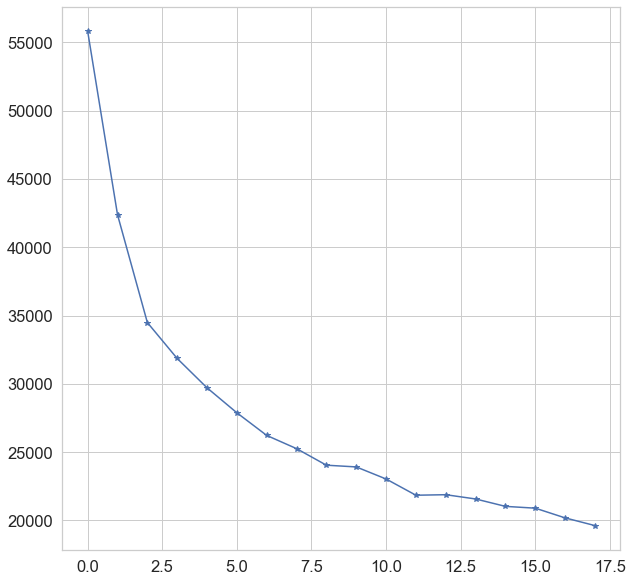

In [11]:
inertias=[]
for k in range(2, 20):
    
    print(k)
    clusterer= MiniBatchKMeans(k, n_init=100)
    clusterer.fit(embeddings)
    inertias.append(clusterer.inertia_)
    
plt.figure(figsize=(10, 10))
plt.plot(inertias, marker='*')
plt.show()

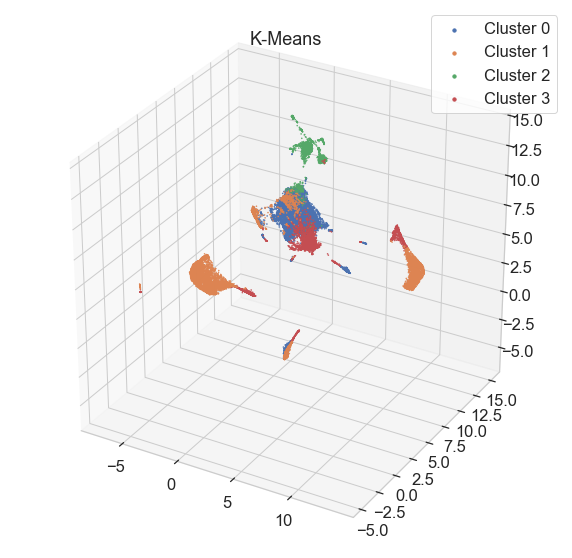


Cluster 0

Negative : 0.98
Positive : 0.02

* @ johanlange i remember street battling with thugs on skidoos , but very faintly , so i suspect i dreamt it

* going to get a cat scan of my elbow

* is dog-tired and wants to go home but has to send the magazine to the printers first

* i 've stuck a big wet blanket on the clothes line outside and i do n't think it has a chance in hell of drying and it 'll probably go mouldy

* working hard for her money ... it 's already hott out prob not going to be a fun day at work

* @ kateyes085 i should be sleeping during the night so i can find employment/plan wedding during the day ! it 's clearly not working out

* man this fat bitch step on y toe and that shit hurts

* i had something really good to post earlier ... just cant remember what it was now

* bout to go to workkk ! boooo

* @ grum hot white choc is so good


Cluster 1

Negative : 0.993
Positive : 0.007

* @ davidarchie i love you ! but i wo n't be able to watch the show . dude , the 

In [12]:
clusterer= MiniBatchKMeans(4, n_init=100)
clusterer.fit(embeddings)
results  = cluster_inspection(
    manifolds, 
    sentences, 
    sentiments, 
    clusterer.labels_, 
    title='K-Means',
    embedding=embeddings,
    pad=0,
    s=0.3
)

## Clustering with HDBSCAN

In [16]:
clusterer = HDBSCAN(min_cluster_size=100, min_samples=40)
clusterer.fit(embeddings)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=100, min_samples=40, p=None,
        prediction_data=False)

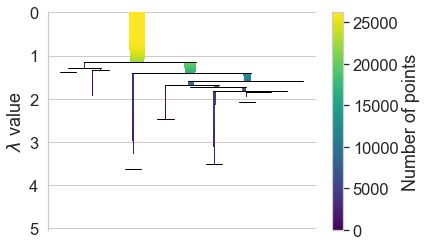

In [17]:
clusterer.condensed_tree_.plot()
plt.show()

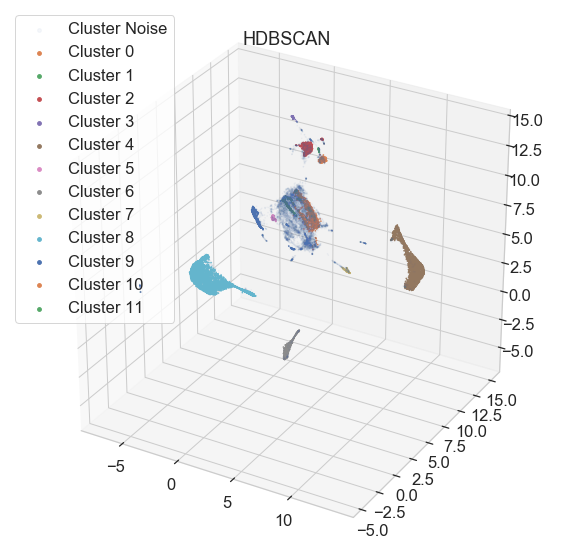


Cluster -1

Negative : 0.776
Positive : 0.224

* last night was amazing i love you

* @ robertkazinsky i agree , people should just get on with their own lifes without criticising others x

* ouchy stomach is cramping . it ai n't too happy with the food here , i guess

* @ jorivai maan talking about being not productive

* i dont like twitter so far

* laying in bed with @ micabebecca watching family guy i & lt ; 3 my best friend

* @ damme hmm , major fail boat at win2k8

* so i 'm locked out of my own room and i have no key spare or otherwise

* received an email with photos and bios of all members of my cohort ... except me . whoops , guess i shoulda ' sent in mine a little earlier

* @ sarabahara ooh sara.. i hate slc.. really really hate it ! slc sucks.. !


Cluster 0

Positive : 1.0

* just beeen working out and now waiting for my iceblendeddd

* @ cooktime thank you baby you are a cook fan i am a fantasia fan -u dont like things being said about david i feel the same about tasi

In [18]:
results  = cluster_inspection(
    manifolds, 
    sentences, 
    sentiments, 
    clusterer.labels_, 
    title='HDBSCAN',
    embedding=embeddings,
    pad=0,
    s=0.4
)

## Clustering with Affinity Propagation

In [19]:
clusterer = Birch()
clusterer.fit(embeddings)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=3,
      threshold=0.5)

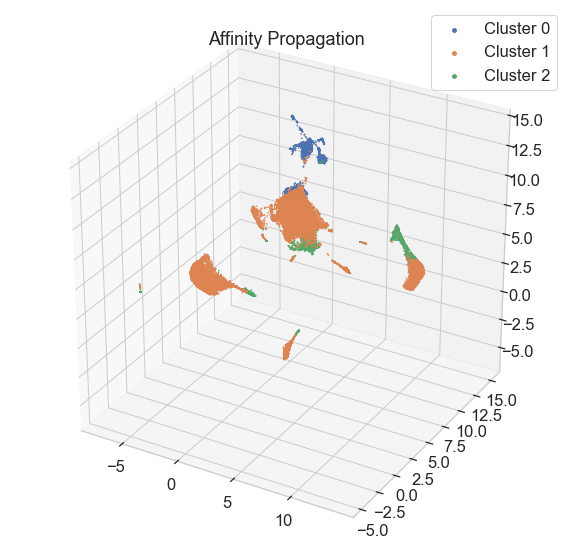


Cluster 0

Negative : 0.78
Positive : 0.22

* @ shade53

* @ morrick lol maybe mmx is the year of pentium

* @ jodysauce ahhh that would rule ! we should do a mix-swap

* waiting for lover roomie to get home so we can go grab grub

* @ bethanybylsma most amazing hug in the world coming soon ! ! ! ! godspeed

* that seems a bit overkill

* @ floppybelly man , i 'm jealous ! in that case , there was no reason for my theater not to show it , so i feel cheated

* http : //twitpic.com/7kii0 - i have a bald patch

* has been back about an hour and half and is fed up already ! and about to throw up as well , niceee

* d-d-doctor house in the house ! hugh laurie no trending topics ! vc viu @ anninha8d ? qndo eu vi pensei q tinha acontecido algo ruim com ele


Cluster 1

Negative : 0.95
Positive : 0.05

* @ nicolespag done that toomany times myself .

* @ hyraxmedia no problem , will have a good play with everything over the extended weekend and let you know if i find any problems

* @ amandaa

In [20]:
results  = cluster_inspection(
    manifolds, 
    sentences, 
    sentiments, 
    clusterer.labels_, 
    title='Affinity Propagation',
    embedding=embeddings,
    pad=0,
    s=0.4
)

## Clustering Agglomerative

In [21]:
clusterer = AgglomerativeClustering(7)
clusterer.fit(embeddings)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=7)

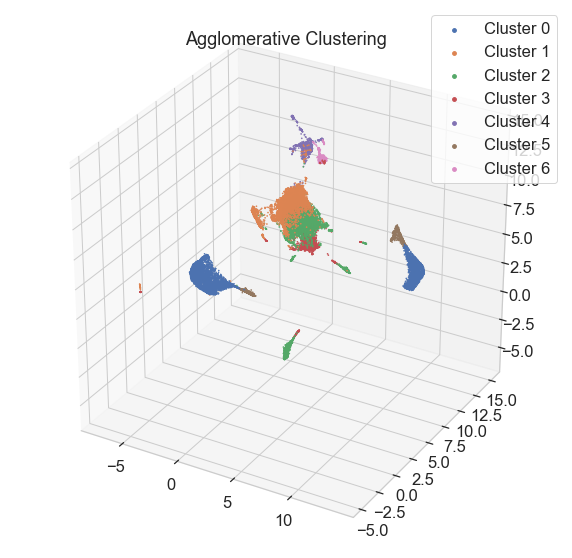


Cluster 0

Negative : 0.979
Positive : 0.021

* @ tastefulcupcake ca n't , i have an online test ! !

* feeling yucky tonight . think lil boy is too .

* home again , heading to bed . i love getting 8 hrs of sleep ! !

* @ jaybranch no worries just cant blip u more then 3 times defo top tunes though ! !

* @ knoxlight currently we do not - we are starting to get more and more requests for the mac version though , so you never know !

* @ bq3 i know . i miss @ witenike too when he 's not here . just not the same w/o him .

* @ rachelstarlive yeah not bad for a little thing ! i wish we could bring in a camcorder though !

* @ garyvee just had a glass of wine from vina mar in chile . my last bottle from the trip it 's organic , a cab sauv/cab franc mix !

* just watched the bit where @ michael_castro 's whole room went home grrr !

* @ shama we still have to do it manually i 'm going to big the dev team to allow videos to appear automatically !


Cluster 1

Negative : 0.992
Positive : 0.

In [22]:
results  = cluster_inspection(
    manifolds, 
    sentences, 
    sentiments, 
    clusterer.labels_, 
    title='Agglomerative Clustering',
    embedding=embeddings,
    pad=0,
    s=0.4
)